# DA&ML Basics - Assignment 2: CRISP-DM Model with Titanic Data (max. 10 points)

Goal of this assignment is to apply **CRISP-DM** process model for given dataset of Titanic passengers.

* First you load **Titanic** dataset, and then extract more information from the dataset and visualize the results.
* Also, two basic machine learning classification models are implemented. 

You can find Titanic dataset from the *data/* subdirectory:
[Titanic dataset](data/titanic.csv).
Use this dataset in the Assignment 3.

### Add your information

In [3]:
# TODO: Replace with your name or names
student_name = 'Juuso Leppänen'
student_email = 'AD1885@student.jamk.fi'

## 2.1: Business Understanding (max. 1 points)

In this phase, you should define your project goals and success criteria.

**Question**: Can you think what these could be for this assignment?

* **TODO**: Define project goals and success criteria.

**Project goal**
  
The goal of the project is to build models that predict whether a Titanic passenger survived,
using the survived column as the target variable.
Another objective is to provide data-driven insights into which features most strongly influence a passenger’s likelihood of survival.

**Success criteria**
  
To consider the project successful,
the model should achieve reasonable performance.
A suitable baseline is an accuracy higher than 0.75,
and because the classes may be imbalanced,
priority should be given to the F1-score of the minority class.
The project should also deliver clear explanations of the key features that influence survival through feature importance analysis.
Additionally, the data preprocessing pipeline must be clean and reproducible,
and it should correctly handle missing values as well as encode categorical variables.

## 2.2: Data Understanding (max. 3 points)

In the "Data Understanding" phase of this CRISP-DM project, you aim to get a grasp of your dataset and its characteristics.

What can you do in this phase?

1. Structure of dataset. Understand the dataset's structure like the number of features (columns), the data types of each feature, and the size of the dataset.
2. Summary statistics. Calculate summary statistics for numerical features, such as mean, median etc.
3. Missing values. Identify the missing values of the dataset.
4. Data visualization. Create data visualizations to gain insights of the data.
5. Outlier detection. Identify and examine potential outliers. You can use chart types like box plots or scatter plots to visualize outliers.

Complete these five tasks using Titanic dataset. Remember also to add Markdown cells to your Jupyter Notebook documents to explain.

Use also different styles in Markdown text: lists, figures, highlights, bold, italic, links, even direct quotes, etc.
It makes Jupyter Document easier to read and highlights the key points.

###  Structure of Dataset

Load Titanic dataset, and then show few lines of data and information of column types.

In [12]:
# TODO: Structure of dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

sns.set_style("whitegrid")
%matplotlib inline

def show_df_info(df):
    print("Shape:", df.shape)
    print("\nColumns and dtypes:")
    print(df.dtypes)
    display(df.head())
    
file_name = 'data/titanic.csv'

if os.path.exists(file_name):
    df = pd.read_csv(file_name)
    print(f"Loaded local file: {file_name}")
else:
    df = sns.load_dataset("titanic")
    print("Loaded seaborn 'titanic' dataset")
show_df_info(df)

Loaded local file: data/titanic.csv
Shape: (891, 12)

Columns and dtypes:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary Statistics
Show basic summary and information of the dataset.

In [15]:
# TODO: Summary statistics
num_df = df.select_dtypes(include = [np.number])
cat_df = df.select_dtypes(exclude = [np.number])

print("numerical summary:")
display(num_df.describe().T)

print("\nCategorical value counts:")
for col in cat_df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna = False).head(10))

numerical summary:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Categorical value counts:

--- Name ---
Name
Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: count, dtype: int64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Ticket ---
Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

--- Cabin ---
Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C

### Missing Values
Calculate missing values in the dataset.

Count NaN values in each column.

In [18]:
# TODO: Missing values
missing = df.isna().sum().sort_values(ascending = False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.concat([missing, missing_pct], axis = 1)
missing_table.columns = ["missing_count", "missing_pct"]
display(missing_table)

,missing_count,missing_pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


### Visualization

Visualize survivors, passenger ages, survival rate etc. Then try to find different ways to visualize data.

Ideas what to visualize:
* the count of survivors.
* the distribution of passenger ages.
* the survival rate by passenger class.
* the survival rate by gender.
* the survival rate by passenger class and gender.
* more visualization ideas from you?

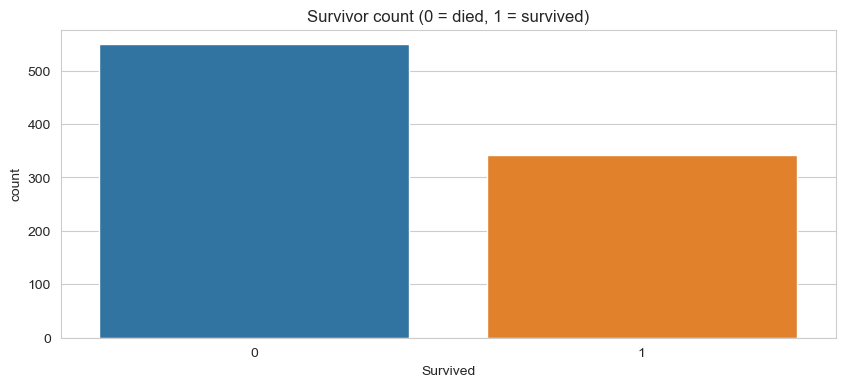

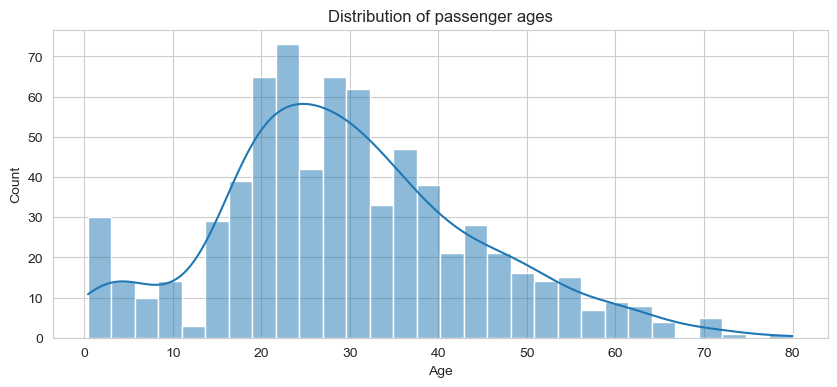

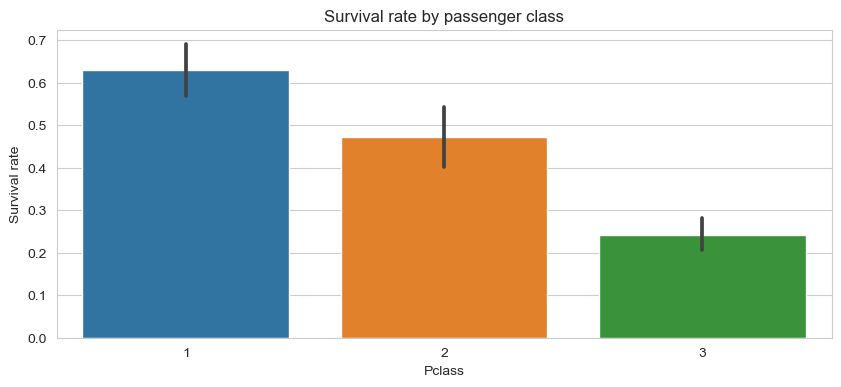

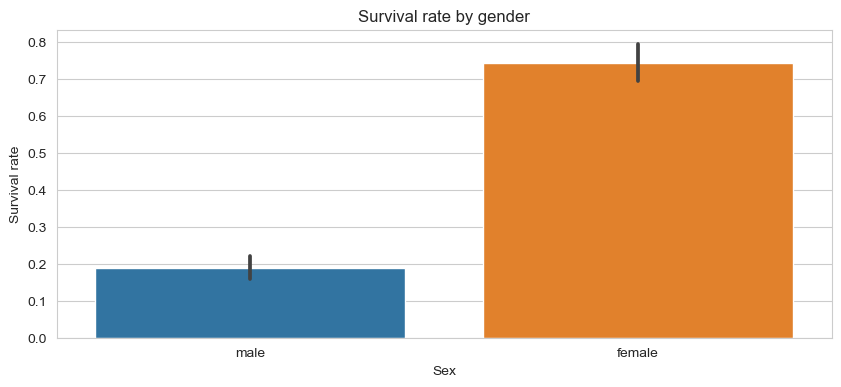

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

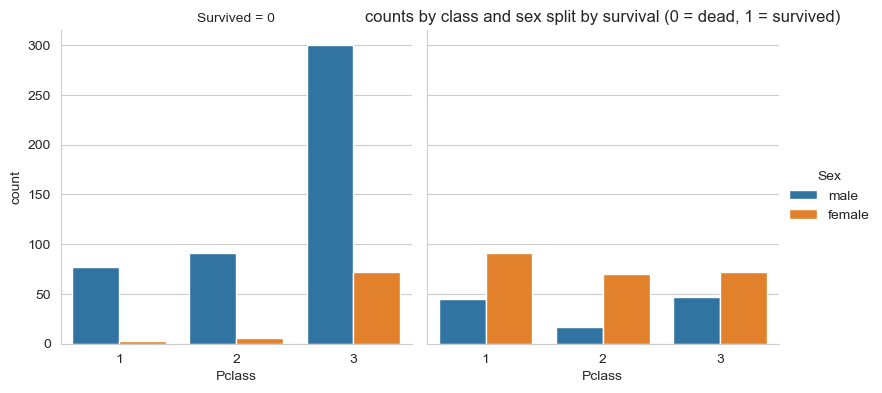

In [43]:
# TODO: Visualization
plt.figure(figsize = (10, 4))
sns.countplot(x = "Survived", data = df)
plt.title("Survivor count (0 = died, 1 = survived)")
plt.show()

plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = "Age", bins = 30, kde = True)
plt.title("Distribution of passenger ages")
plt.show()

plt.figure(figsize = (10, 4))
sns.barplot(x = "Pclass", y = "Survived", data = df)
plt.title("Survival rate by passenger class")
plt.ylabel("Survival rate")
plt.show()

plt.figure(figsize = (10, 4))
sns.barplot(x = "Sex", y = "Survived", data = df)
plt.title("Survival rate by gender")
plt.ylabel("Survival rate")
plt.show()

plt.figure(figsize = (12, 5))
sns.catplot(x = "Pclass", hue = "Sex", col = "Survived", data = df, kind = "count", height = 4, aspect = 1.0)
plt.title("counts by class and sex split by survival (0 = dead, 1 = survived)")
plt.show()


### Outlier Detection
One important step for the quality of the data is to implement **Outlier Detection**.

How to detect outliers?

* You can detect outliers using **visual inspection** of the dataset by creating scatter plots, histograms, box plots etc.
* You can use statistical methods like **Z-Score** or **IQR**.

**Z-Score**: Calculate the z-score for each data point. If the z-score is significantly different from zero (> 2 or < -2), it may be an outlier.

Using the **IQR**, the outlier data points are the ones falling below Q1 – 1.5 IQR or above Q3 + 1.5 IQR.
The Q1 is the 25th percentile, and Q3 is the 75th percentile of the dataset, and IQR represents the _interquartile_ range calculated by _(Q3–Q1)_.

IQR outliers count per numeric column:
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 11, 'SibSp': 46, 'Parch': 213, 'Fare': 116}

Z-score (>3) outliers per numeric column:
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 2, 'SibSp': 30, 'Parch': 15, 'Fare': 20}


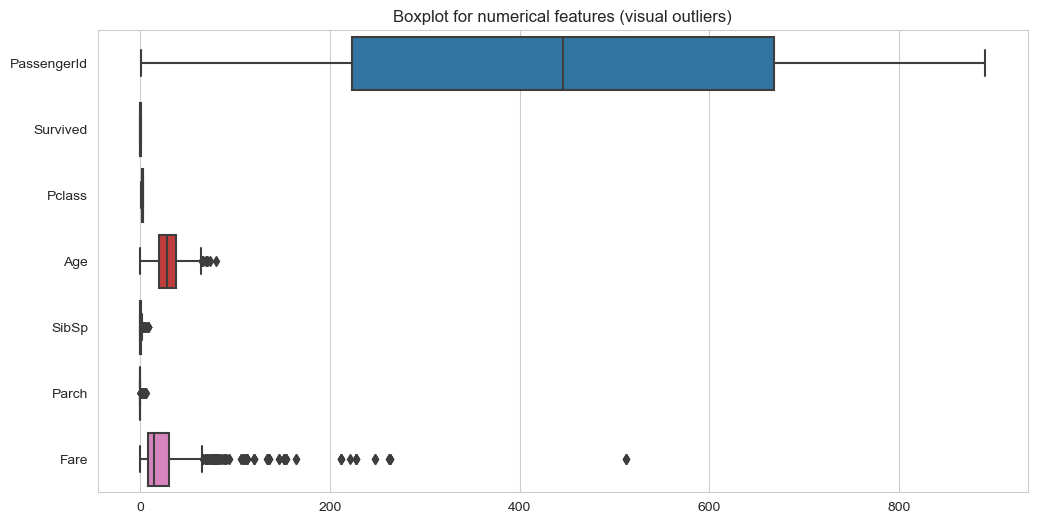

In [45]:
# TODO: Outlier detection
numeric_cols = num_df.columns.tolist()
iqr_outliers = {}
zscore_outliers = {}

for col in numeric_cols:
    series = df[col].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    out_iqr = df[(df[col] < lower) | (df[col] > upper)]
    iqr_outliers[col] = out_iqr.shape[0]
    # z-score
    z_scores = np.abs(stats.zscore(series))
    out_z = (z_scores > 3).sum()
    zscore_outliers[col] = int(out_z)

print("IQR outliers count per numeric column:")
print(iqr_outliers)
print("\nZ-score (>3) outliers per numeric column:")
print(zscore_outliers)

# Visualize boxplots for numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=num_df, orient="h")
plt.title("Boxplot for numerical features (visual outliers)")
plt.show()

## 2.3: Data Preprocessing (max. 3 points)

Data preprocessing is an important step to ensure your dataset is ready for machine learning phase.
Here are your most important tasks for data preprocessing phase with the Titanic dataset.

1. Handling missing values. You should decide how to handle missing values.
2. Feature engineering. You can create new features or transform existing ones. With this dataset, you can extract titles from passenger names, create a family size feature, have a passenger a cabin or not, or categorize age and fare into groups.
3. Visualization. Do visualization with new features. Also recalculate statistics after data is preprocessed.
4. Categorical variable encoding. You need to encode categorical variables for a machine learning model. Select method from one-hot encoding, label encoding or ordinal encoding.
5. Feature scaling. Scaling features, such as age or fare. Select standardization or min-max scaling method for scaling.

### Handling Missing Values
NaN (and Inf) values are problems for ML models.

In [49]:
# TODO: Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Median age
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Most common port
df['Cabin'].fillna('Unknown', inplace=True)  # Unknown cabins

### Feature Engineering

You can create new features or transform existing ones.

Some ideas what new features/columns to create:
* Create a new feature `HasCabin` (has a cabin or not).
* Create a new feature `HasEmbarked` (has an embarkation port or not).
* Extract `ticketNumber` and ``ticketPrefix`` features of tickets.
* Create a new feature `FamilySize`.
* Create a new feature `Deck` from `Cabin` column.
* Extract a new feature `title` from the `Name`.
* More ideas from you.

Extra Question: Are there any passengers who share the same ticket number?

In [53]:
# TODO: Feature engineering
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['TicketPrefix'] = df['Ticket'].str.extract('([A-Za-z\.\/]+)', expand=False).fillna('None')
df['TicketNumber'] = df['Ticket'].str.extract('(\d+)', expand=False)

same_ticket_count = df['TicketNumber'].duplicated().sum()
print("Passengers sharing same ticket number:", same_ticket_count)

Passengers sharing same ticket number: 255


### Visualize New Features

Do visualization with selected new features.

Some ideas what to visualize:
* Visualize based on ticket prefixes.
* Visualize based on ticket numbers.
* Show the survivors based on `Pclass` and embarkation port.
* Also other new features can be used to visualization.

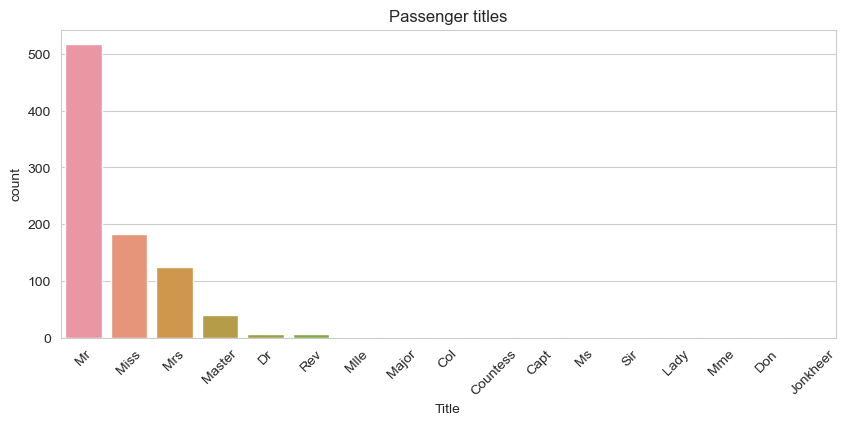

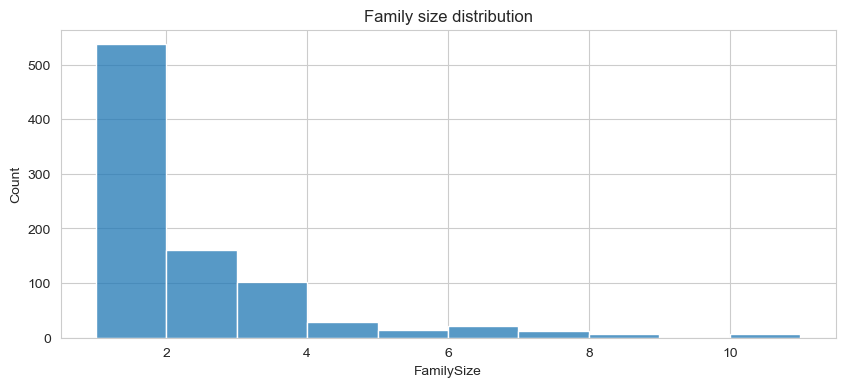

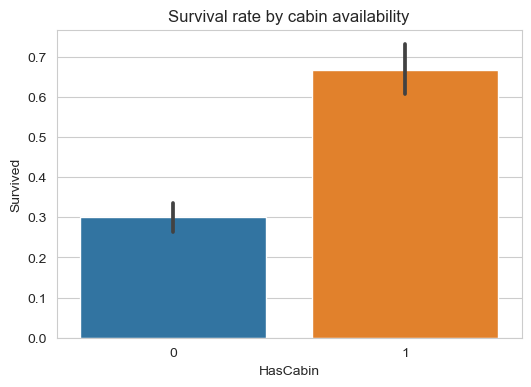

In [55]:
# TODO: Visualization
# Title distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Title', order=df['Title'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Passenger titles")
plt.show()

# Family size distribution
plt.figure(figsize=(10,4))
sns.histplot(df['FamilySize'], bins=10)
plt.title("Family size distribution")
plt.show()

# Survival rate by HasCabin
plt.figure(figsize=(6,4))
sns.barplot(x='HasCabin', y='Survived', data=df)
plt.title("Survival rate by cabin availability")
plt.show()

### Categorical Variable Encoding

Why categorical variable encoding?

 * Since most machine learning models accept only numerical variables, you need to encode categorical variables.
 * Select your encoding method from these: one-hot encoding, label encoding, or ordinal encoding.

In [57]:
# TODO: Categorical variable encoding
categorical_cols = ['Sex', 'Embarked', 'Title', 'TicketPrefix']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Feature Scaling

Why perform feature scaling?

* Most machine learning methods benefit from scaled features.
* Scale all numerical features for a machine learning model.
* Features in your dataset might have different scales, which can vary widely.

There are several common methods for feature scaling:

1. **Min-Max Scaling** scales features to a specific range (commonly 0 to 1 or -1 to 1).
2. **Standardization** (Z-Score) scales features to have a mean of 0 and a standard deviation of 1.
3. **Robust Scaling** uses the median and interquartile range to scale features.

In [59]:
# TODO: Feature scaling
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

## 2.4: Modelling (max. 3 points)

Target is to do **Titanic Survival Prediction with Machine Learning**.
You should build and compare machine learning models for predicting passenger survival on the Titanic.

1) Data splitting

    * Split the dataset into training and testing sets (e.g., _80% training_ and _20% testing_) to evaluate model performance.

2) Modeling

    * Implement two different classifiers: **k-Nearest Neighbors** (kNN), and **Random Forest** (RF).
    * Train each model on the training data.

3) Model evaluation

    * Evaluate the performance of each model on the testing data using evaluation metrics such as accuracy, precision and F1-score.

4) Comparison

    * Compare the results of the classifiers to determine which one performs the best in terms of survival prediction.

5) Conclusion

    * Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.
    * Include visualizations and explanations to explain your findings.

Note: You may consider hyperparameter tuning for the classifiers and further data exploration to enhance your analysis.
You can find with hyperparameter tuning the best configuration for each model. This can increase the performance of your model.

### Preprocessing Data for Machine Learning

Select the features and target variable for an ML process.

Process (replace or delete) all rows with `NaN` values.

In [105]:
# TODO: Preprocessing
# Ensure numeric 'TicketNumber'
df['TicketNumber'] = pd.to_numeric(df['TicketNumber'], errors='coerce')
df['TicketNumber'] = df['TicketNumber'].fillna(0)

# Encode categorical variables
categorical_cols = ['Sex', 'Title', 'Embarked', 'TicketPrefix']  # add any others you want
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select features and target
y = df_encoded['Survived']
X = df_encoded.drop(columns=['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket'])


### Data Splitting

Split the data into **training** and **test sets**.

Use the following properties for split the data in this assignment:

* `y` is the target variable to predict.
* `Test_size=0.2` specifies that 20% of the data will be used for testing.
* `Random_state=42` is used to set a seed for the random number generator, and it ensures that the split will be reproducible.
* `Stratify=y` ensures that the class distribution in the target variable is preserved in both the training and testing sets.

In [108]:
# TODO: Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Modeling
Implement these **two different** machine learning classification models:

1. **k-Nearest Neighbors (kNN) Classification**
2. **Random Forest (RF) Classification**

Then train the models and make predictions using trained ML models with separate test data.

In [111]:
# TODO: Modeling with kNN and Random Forest.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


#### Feature importance values

Show the feature importance values of an ML learning process in descending order if it's possible with the ML method used.

In [114]:
# TODO: Feature importance values (only if the values can be obtained).
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).head(20)

TicketNumber           0.165208
Fare                   0.144989
Age                    0.135099
Title_Mr               0.126504
Sex_male               0.106425
Pclass                 0.049009
FamilySize             0.042485
HasCabin               0.030736
Title_Mrs              0.029397
Title_Miss             0.028826
SibSp                  0.028143
Parch                  0.019592
Embarked_S             0.018490
TicketPrefix_None      0.011741
Embarked_Q             0.007447
Title_Master           0.007100
TicketPrefix_STON/O    0.006651
TicketPrefix_PC        0.005014
TicketPrefix_A/        0.004095
TicketPrefix_W./C.     0.003343
dtype: float64

### Model Evaluation

Evaluate the performance of both models. Calculate metrics that can be compared.

In [117]:
# TODO: Evaluation of both models
from sklearn.metrics import accuracy_score, precision_score, f1_score

def evaluate(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

knn_results = evaluate(y_test, knn_pred)
rf_results = evaluate(y_test, rf_pred)

print("kNN results:", knn_results)
print("Random Forest results:", rf_results)

kNN results: {'accuracy': 0.6703910614525139, 'precision': 0.5757575757575758, 'f1': 0.562962962962963}
Random Forest results: {'accuracy': 0.7932960893854749, 'precision': 0.7285714285714285, 'f1': 0.7338129496402878}


### Comparison

Compare the results of the classifiers.

In [119]:
# TODO: Comparison of results

comparison = pd.DataFrame({
    "Model": ["kNN", "Random Forest"],
    "Accuracy": [knn_results["accuracy"], rf_results["accuracy"]],
    "Precision": [knn_results["precision"], rf_results["precision"]],
    "F1-score": [knn_results["f1"], rf_results["f1"]]
})

comparison

,Model,Accuracy,Precision,F1-score
0,kNN,0.670391,0.575758,0.562963
1,Random Forest,0.793296,0.728571,0.733813


### Conclusion

Summarize your findings.

**TODO: Your Conclusion: (write this conclusion with Markdown)**
  
Based on the evaluation metrics, the Random Forest classifier clearly outperforms the kNN classifier on the Titanic dataset. Random Forest achieves higher accuracy, precision, and F1-score, indicating that it is better at capturing complex nonlinear relationships in the data.

In contrast, the kNN model performs noticeably worse. This is likely due to the dataset containing heterogeneous numerical features, scaled values, and dummy-encoded categorical variables, which can negatively affect distance-based models like kNN.

Overall, Random Forest provides a more reliable and robust prediction performance for survival classification in this dataset. It handles feature interactions, nonlinearity, and noise more effectively than kNN.